In [1]:
import pandas as pd

pd.options.display.max_rows = None
pd.options.display.max_columns = None

datafile = "../data/2022-train-v2.xlsx"
data = pd.read_excel(datafile)

The cell with 0 value is the same as NaN.

In [2]:
data.replace(0, None, inplace=True)
data.isna().sum()

sensor_point5_i_value       0
sensor_point6_i_value       0
sensor_point7_i_value       0
sensor_point8_i_value       0
sensor_point9_i_value       0
sensor_point10_i_value      0
clean_temp                  0
clean_ec                    0
clean_ph4                 286
clean_ph5                 286
clean_ph7                 286
clean_ph8                   0
clean_pressure11            0
clean_pressure12            0
clean_pressure21            0
clean_pressure22            0
clean_pressure23            0
clean_pressure31            0
clean_pressure33            0
clean_pressure41            0
clean_pressure42            0
clean_pressure51            0
clean_pressure52            0
clean_pressure61            0
clean_pressure62            0
clean_pressure71            0
clean_pressure72            0
clean_pressure81            0
clean_pressure82            0
clean_pressure91            0
clean_pressure92            0
clean_pressure101         621
clean_pressure102         238
oven_pa1  

In [3]:
(data.isna().sum() > 0).sum() # 有缺失值的欄位數 = 58，大概快要一半欄位了

58

In [4]:
(data.isna().sum(axis=1) > 0).sum() # 有缺失值的 Row = 635，每一個 row 都有缺失值

635

依照欄位名稱，大致可以猜想4個製程依序為 clean, oven, painting, env
每一道製程，會經過幾道手續呢？先將欄位依製程分類。

In [5]:
c_cols = [col for col in data.columns if 'clean' in col]
o_cols = [col for col in data.columns if 'oven' in col]
p_cols = [col for col in data.columns if 'paint' in col]
e_cols = [col for col in data.columns if 'env' in col]
print("Lens = ", len(c_cols), len(o_cols), len(p_cols), len(e_cols)) # 各製程最大程序數目

Lens =  27 10 60 28


In [8]:
print("# c_cols number:\n", ((data[c_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')
print("# o_cols number:\n", ((data[o_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')
print("# p_cols number:\n", ((data[p_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')
print("# e_cols number:\n", ((data[e_cols] > 0).sum(axis=1)).value_counts().to_string(), '\n', sep='')

# c_cols number:
26    321
22    210
23     62
25     28
24     14

# o_cols number:
10    635

# p_cols number:
50    345
30    109
40     69
60     62
45     33
20      5
49      4
35      3
48      3
22      2

# e_cols number:
27    380
21     88
26     86
28     52
25     25
22      4



In [53]:
import re
ndata = data.copy().fillna(0)
for i in range(ndata.shape[0]):
    for col in p_cols:
        colpat = re.sub(r'\d+', '', col)
        idx = p_cols.index(col)
        for j in range(idx+1, len(p_cols)):
            ncol = p_cols[j]
            ncolpat = re.sub(r'\d+', '', ncol)
            if colpat == ncolpat:
                if ndata.loc[i, col]==0 and ndata.loc[i, ncol]>0:
                    ndata.loc[i, col] = ndata.loc[i, ncol]
                    ndata.loc[i, ncol] = 0
                    break
ndata[p_cols].describe()

,painting_g1_act_a_air,painting_g1_act_f_air,painting_g1_act_t_air,painting_g1_act_hvv,painting_g1_act_hvc,painting_g2_act_a_air,painting_g2_act_f_air,painting_g2_act_t_air,painting_g2_act_hvv,painting_g2_act_hvc,painting_g3_act_a_air,painting_g3_act_f_air,painting_g3_act_t_air,painting_g3_act_hvv,painting_g3_act_hvc,painting_g4_act_a_air,painting_g4_act_f_air,painting_g4_act_t_air,painting_g4_act_hvv,painting_g4_act_hvc,painting_g5_act_a_air,painting_g5_act_f_air,painting_g5_act_t_air,painting_g5_act_hvv,painting_g5_act_hvc,painting_g6_act_a_air,painting_g6_act_f_air,painting_g6_act_t_air,painting_g6_act_hvv,painting_g6_act_hvc,painting_g7_act_a_air,painting_g7_act_f_air,painting_g7_act_t_air,painting_g7_act_hvv,painting_g7_act_hvc,painting_g8_act_a_air,painting_g8_act_f_air,painting_g8_act_t_air,painting_g8_act_hvv,painting_g8_act_hvc,painting_g9_act_a_air,painting_g9_act_f_air,painting_g9_act_t_air,painting_g9_act_hvv,painting_g9_act_hvc,painting_g10_act_a_air,painting_g10_act_f_air,painting_g10_act_t_air,painting_g10_act_hvv,painting_g10_act_hvc,painting_g11_act_a_air,painting_g11_act_f_air,painting_g11_act_t_air,painting_g11_act_hvv,painting_g11_act_hvc,painting_g12_act_a_air,painting_g12_act_f_air,painting_g12_act_t_air,painting_g12_act_hvv,painting_g12_act_hvc
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,7.850394,143.154961,269.043748,47.028409,16.165795,8.308945,155.441953,289.001008,50.132740,17.480583,8.169228,123.534646,282.518173,47.231181,17.294535,7.677575,144.541606,263.505260,46.309748,16.048299,7.532551,137.970898,258.953984,46.340772,12.434835,7.465055,147.253291,261.180315,47.380724,14.771228,6.476441,127.229480,225.412362,41.336551,10.764583,6.437480,94.853197,221.668142,38.176756,12.522583,5.545843,110.090362,191.958441,35.468992,10.338646,5.035512,98.518598,172.711528,31.838961,7.875874,0.441622,8.216835,15.139543,2.940551,0.664394,0.323354,6.152378,10.765685,1.951890,0.599354
std,2.034697,38.518124,69.504839,11.960552,4.959968,1.699177,31.843257,59.673049,10.622361,4.763067,1.728372,32.278198,59.543971,10.234531,5.867597,1.816189,34.163780,61.608506,10.391287,6.257827,2.174499,44.919201,73.897879,13.935106,4.993228,2.413864,47.205709,83.238700,14.732731,5.942976,3.573212,69.736358,123.980443,22.740219,7.008488,3.506203,52.558002,119.893759,20.508452,7.768952,3.917668,77.558756,135.304704,24.876726,7.679183,3.988266,77.063406,136.205028,25.263164,7.098358,1.562063,28.923353,53.299005,10.337136,2.362852,1.129335,21.397207,37.442547,6.830055,2.106099
min,0.090000,2.960000,5.580000,1.030000,0.100000,0.170000,3.030000,5.580000,0.970000,0.390000,0.160000,0.120000,0.250000,0.880000,0.310000,0.160000,3.120000,5.700000,1.070000,0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.005000,129.910000,236.930000,42.100000,13.905000,7.690000,143.460000,265.540000,46.095000,14.965000,7.300000,101.540000,260.880000,42.140000,13.260000,6.750000,129.020000,227.130000,41.385000,11.450000,6.800000,121.655000,233.325000,40.805000,10.105000,6.380000,126.915000,223.440000,40.680000,11.475000,4.420

,painting_g1_act_a_air,painting_g1_act_f_air,painting_g1_act_t_air,painting_g1_act_hvv,painting_g1_act_hvc,painting_g2_act_a_air,painting_g2_act_f_air,painting_g2_act_t_air,painting_g2_act_hvv,painting_g2_act_hvc,painting_g3_act_a_air,painting_g3_act_f_air,painting_g3_act_t_air,painting_g3_act_hvv,painting_g3_act_hvc,painting_g4_act_a_air,painting_g4_act_f_air,painting_g4_act_t_air,painting_g4_act_hvv,painting_g4_act_hvc,painting_g5_act_a_air,painting_g5_act_f_air,painting_g5_act_t_air,painting_g5_act_hvv,painting_g5_act_hvc,painting_g6_act_a_air,painting_g6_act_f_air,painting_g6_act_t_air,painting_g6_act_hvv,painting_g6_act_hvc,painting_g7_act_a_air,painting_g7_act_f_air,painting_g7_act_t_air,painting_g7_act_hvv,painting_g7_act_hvc,painting_g8_act_a_air,painting_g8_act_f_air,painting_g8_act_t_air,painting_g8_act_hvv,painting_g8_act_hvc,painting_g9_act_a_air,painting_g9_act_f_air,painting_g9_act_t_air,painting_g9_act_hvv,painting_g9_act_hvc,painting_g10_act_a_air,painting_g10_act_f_air,painting_g10_act_t_air,painting_g10_act_hvv,painting_g10_act_hvc,painting_g11_act_a_air,painting_g11_act_f_air,painting_g11_act_t_air,painting_g11_act_hvv,painting_g11_act_hvc,painting_g12_act_a_air,painting_g12_act_f_air,painting_g12_act_t_air,painting_g12_act_hvv,painting_g12_act_hvc
count,473.00,473.0,473.00,473.00,473.00,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,617.00,619.00,619.00,617.00,617.00,471.00,471.00,471.00,464.0,468.00,62.00,62.00,62.00,62.00,62.00,473.00,473.00,473.00,473.00,473.00,635.000000,635.000000,635.000000,635.00000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,614.00,614.00,614.00,614.00,614.00,504.00,504.00,504.00,504.00,504.00,62.00,62.00,62.00,62.0,62.00
unique,178.00,202.0,205.00,208.00,204.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.00,291.00,296.00,284.00,273.00,192.00,223.00,225.00,216.0,206.00,25.00,25.00,25.00,25.00,25.00,180.00,210.00,211.00,203.00,195.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,224.00,293.00,296.00,286.00,257.00,205.00,236.00,238.00,235.00,217.00,25.00,25.00,25.00,25.0,25.00
top,8.18,200.0,349.98,50.26,17.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.63,199.98,349.98,47.05,17.61,7.97,186.33,309.65,63.0,17.62,5.67,111.29,193.43,37.97,6.04,7.41,200.02,350.02,55.62,15.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.11,198.18,237.46,38.11,9.82,6.54,133.26,229.02,40.57,10.85,5.18,103.93,181.96,31.5,10.71
freq,11.00,20.0,15.00,9.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.00,12.00,12.00,9.00,11.00,11.00,7.00,8.00,13.0,8.00,6.00,6.00,6.00,6.00,6.00,14.00,11.00,11.00,9.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.00,10.00,8.00,8.00,10.00,9.00,8.00,8.00,8.00,8.00,6.00,6.00,6.00,6.0,6.00
mean,NaN,NaN,NaN,NaN,NaN,8.051906,149.853906,277.317339,47.889827,17.298661,8.334331,127.240488,291.934126,48.736425,17.611402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.810157,154.140094,271.567717,51.29948,12.066441,8.246504,131.875291,284.246236,49.380488,16.726315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.693122,32.454599,58.575290,9.836993,4.880649,1.709046,33.873996,58.863944,10.993309,5.628474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.710939,33.279287,59.398701,10.41948,5.051871,1.766191,36.780467,58.800702,10.781000,4.922451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.170000,3.030000,5.580000,0.970000,0.390000,0.160000,2.070000,5.580000,0.880000,0.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,4.430000,7.230000,1.36000,0.250000,0.190000,2.480000,6.840000,1.080000,0.350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,7.050000,134.090000,241.760000,43.140000,14.210000,7.630000,102.260000,268.905000,42.545000,14.830000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

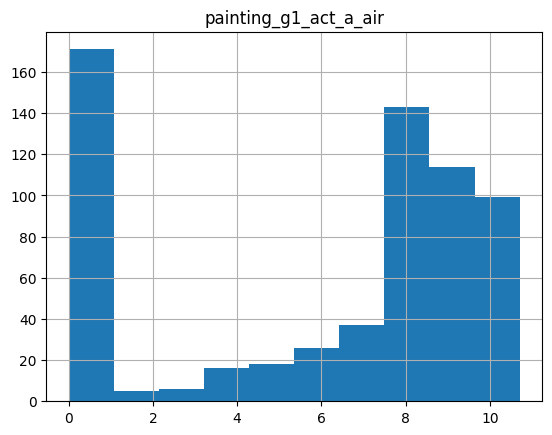

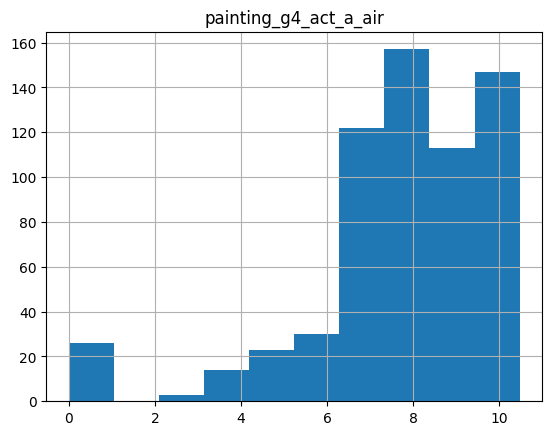

In [34]:
ndata = data #.fillna(0)
ndata.fillna(0).filter(regex='g1_act_a_air').hist()
ndata.fillna(0).filter(regex='g4_act_a_air').hist()
ndata.filter(regex='painting').describe(include='all')
#(ndata.filter(regex='g4_') < 0.3).sum(axis=1)

### 結果
大部份工件經過 c_cols 數為 26 或 22 道，但還包括 23, 25, 24；
所有工件經過 o_cols 數都是 10 道；
大部份工件經過 p_cols 數為 50 道，但還包括 22-60 不等的程序數；
大部份工件經過 e_cols 數為 27 道，但還包括 21-28 不等的程序數；

### 猜想

1. 因為要預測膜厚度，painting 應該是影響最大的；oven 可能有溫度值，影響其次；然後可能是 env (不知是否環境因素)；clean 可能影響較小？  
2. 看起來缺失值可設為 0，對輸出影響較小。